### Loading Libraries Required

In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import torch
import numpy as np

In [2]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Appliances.json.gz

--2023-12-10 04:07:52--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Appliances.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59884788 (57M) [application/x-gzip]
Saving to: ‘meta_Appliances.json.gz’

meta_Appliances.jso 100%[===================>]  57.11M  17.1MB/s    in 3.7s    

2023-12-10 04:07:57 (15.6 MB/s) - ‘meta_Appliances.json.gz’ saved [59884788/59884788]



In [3]:
def open_to_df(file):
  '''
  Function to convert json to pandas dataframe
  '''
  data = []
  with gzip.open(file) as f:
      for l in f:
          data.append(json.loads(l.strip()))

  df = pd.DataFrame.from_dict(data)
  return df

In [4]:
metadata = open_to_df('meta_Appliances.json.gz')
metadata.head(3)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Tupperware Freezer Square Round Container Set ...,[],,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,"[>#39,745 in Appliances (See top 100)]",[],{},Appliances,,"November 19, 2008",,7301113188,[],[]
1,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[2 X Tupperware Pure & Fresh Unique Covered Co...,,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],{},Appliances,,"June 5, 2016",$3.62,7861850250,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Appliances, Parts &amp; Accessories]",,[],,The Cigar - Moments of Pleasure,[],,The Cigar Book,[],"[>#1,861,816 in Home &amp; Kitchen (See Top 10...","[B01HCAVSLK, 1632206579]",{},Amazon Home,,,$150.26,8792559360,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [5]:
metadata.shape

(30445, 19)

In [7]:
metadata['category'].iloc[:10000].value_counts()

[Appliances, Parts & Accessories]                                                                                         1887
[Appliances, Parts & Accessories, Refrigerator Parts & Accessories]                                                        852
[Appliances, Parts & Accessories, Range Parts & Accessories]                                                               639
[Appliances, Parts & Accessories, Washer Parts & Accessories]                                                              591
[Appliances, Parts & Accessories, Dishwasher Parts & Accessories]                                                          522
                                                                                                                          ... 
[Appliances, Ranges, Ovens &amp; Cooktops, Ranges, Slide-In Ranges]                                                          1
[Appliances, Parts &amp; Accessories, Humidifier Parts &amp; Accessories, Accessories]                         

In [ ]:
# metadata.to_csv('metadata.csv',escapechar='\\')

In [8]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz

--2023-12-10 04:08:33--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69677301 (66M) [application/x-gzip]
Saving to: ‘Appliances.json.gz’

Appliances.json.gz  100%[===================>]  66.45M  18.6MB/s    in 4.4s    

2023-12-10 04:08:38 (15.1 MB/s) - ‘Appliances.json.gz’ saved [69677301/69677301]



In [9]:
userrating = open_to_df('Appliances.json.gz')
userrating.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5.0,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5.0,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5.0,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5.0,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN


In [10]:
userrating = userrating.iloc[35:,:]
# first 35 reviews were incorrect and were of the domain 'books', erroneous data
userrating.shape

(602742, 12)

In [11]:
userrating.head(20)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
35,5.0,NaN,True,"03 20, 2015",A3SHVDMM83IHJ4,B00002N7IL,{'Size:': ' Pack of 1'},steve crumpler,Just what I needed for my electric range. Matc...,Matched pigtail cord and works great.,1426809600,NaN
36,5.0,NaN,True,"04 20, 2013",A2OXDRWBASV91Y,B00004SQHD,"{'Size:': ' 6 ft', 'Style:': ' (Old)'}",Harold E. Ewing,I like the fact that the wire ends have mounti...,complete package,1366416000,NaN
37,5.0,2,True,"03 16, 2013",A2KG6AWJSWILPR,B00004SQHD,"{'Size:': ' 6 ft', 'Style:': ' (Old)'}",Christopher J Park,"Needed another couple of feet with new dryer, ...",Perfect Fit,1363392000,NaN
38,5.0,NaN,True,"02 14, 2017",A2CBE6VYOARZN4,B00004SQHD,"{'Size:': ' 4-Foot', 'Style:': ' (Old)'}",Gerry,Good quality at a reasonable price,Everything works,1487030400,NaN
39,5.0,NaN,True,"12 21, 2016",AVKOTZD5ZIOX5,B00004SQHD,"{'Size:': ' 4-Foot', 'Style:': ' (Old)'}",Dan W.,Planning on hooking this to my RV,50 amp cable,1482278400,NaN
40,5.0,NaN,True,"04 15, 2016",A33DUVUIC7G553,B00004SQHD,"{'Size:': ' 6 ft', 'Style:': ' (Old)'}",Ryan,This product is a pretty simple one. I do lik...,"Good range cord, standard nema 14-50p fits wit...",1460678400,NaN
41,4.0,NaN,True,"12 27, 2015",A2E8Q13IQL62XN,B00004SQHD,"{'Size:': ' 6 ft', 'Style:': ' (Old)'}",ken,WORKED GREAT,Four Stars,1451174400,NaN
42,5.0,NaN,True,"06 17, 2015",A217M6GCFYSEVT,B00004SQHD,"{'Size:': ' 6 ft', 'Style:': ' (Old)'}",Randy D Etheridge,very good quality. used as a feeder line to m...,very good quality. used as a feeder line to my...,1434499200,NaN
43,5.0,NaN,True,"05 14, 2015",A7S6BILPA0K7K,B00004SQHD,"{'Size:': ' 6 ft', 'Style:': ' (Old)'}",Bill S.,Excellent,Five Stars,1431561600,NaN
44,3.0,NaN,True,"05 6, 2015",A2Y7GJMFR0886X,B00004SQHD,"{'Size:': ' 4-Foot', 'Style:': ' (Old)'}",JI,"The cable works well and does what it should, ...","The cable works, but was hard to maneuver and ...",1430870400,NaN


In [12]:
# userrating.to_csv('userrating.csv')

## DATA UNDERSTANDING

In [13]:
userrating.describe()

,overall,unixReviewTime
count,602742.000000,6.027420e+05
mean,4.274192,1.455053e+09
std,1.301624,5.481717e+07
min,1.000000,9.722592e+08
25%,4.000000,1.423613e+09
50%,5.000000,1.464134e+09
75%,5.000000,1.496016e+09
max,5.000000,1.538611e+09


In [14]:
select_item_col = ['asin','title','brand']
itemdata = metadata[select_item_col].copy()
itemdata.head()

,asin,title,brand
0,7301113188,Tupperware Freezer Square Round Container Set ...,Tupperware
1,7861850250,2 X Tupperware Pure &amp; Fresh Unique Covered...,Tupperware
2,8792559360,The Cigar - Moments of Pleasure,The Cigar Book
3,9792954481,Caraselle 2X 50G Appliance Descalene,Caraselle
4,B00002N5EL,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,EATON Wiring


In [15]:
select_userreview_col = ['reviewerID', 'asin', 'overall', 'unixReviewTime', 'reviewText']
userdata = userrating[select_userreview_col].copy()
userdata.head()

,reviewerID,asin,overall,unixReviewTime,reviewText
35,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...
36,A2OXDRWBASV91Y,B00004SQHD,5.0,1366416000,I like the fact that the wire ends have mounti...
37,A2KG6AWJSWILPR,B00004SQHD,5.0,1363392000,"Needed another couple of feet with new dryer, ..."
38,A2CBE6VYOARZN4,B00004SQHD,5.0,1487030400,Good quality at a reasonable price
39,AVKOTZD5ZIOX5,B00004SQHD,5.0,1482278400,Planning on hooking this to my RV


In [16]:
cdata = pd.merge(userdata, itemdata, on='asin', how='inner')
cdata.head()

,reviewerID,asin,overall,unixReviewTime,reviewText,title,brand
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
1,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,this particular type is perfect and easily ada...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
3,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,this particular type is perfect and easily ada...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
4,AVP16JFIT6LPL,B00002N7IL,5.0,1521504000,excellent,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton


### Removing Duplicate Review Records via Composite Key of Review Time & IDs

In [22]:
cdata['composite_key'] = cdata['reviewerID'].astype(str) + '_' + cdata['asin'].astype(str) + '_' + cdata['unixReviewTime'].astype(str)
cdata = cdata.drop_duplicates(subset='composite_key')
cdata = cdata.drop(columns='composite_key')
cdata

,reviewerID,asin,overall,unixReviewTime,reviewText,title,brand
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,this particular type is perfect and easily ada...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
4,AVP16JFIT6LPL,B00002N7IL,5.0,1521504000,excellent,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
6,A2J2T9LX2HC947,B00002N7IL,5.0,1507939200,Yea baby,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
8,AJN26F4KMWD59,B00002N7IL,5.0,1501459200,Well made and works well,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
...,...,...,...,...,...,...,...
615742,A24A9P4F2SLTK5,B01HJH2PY0,5.0,1502323200,perfect replacement for our broken one.,Bosch 00683958 Panel-Facia,Bosch
615743,A2JCB4KHBWEELW,B01HJHHEA0,2.0,1533081600,"Quick delivery, did not fit my stove.",Frigidaire 316543810 Knob,Frigidaire
615744,A1LDYYVTLPP2Z5,B01HJHHEA0,5.0,1523577600,Perfect match for my oven!,Frigidaire 316543810 Knob,Frigidaire
615745,AP1M5O06IOYZ7,B01HJH92JQ,1.0,1521763200,Doesn't work with Bosch SHX33A06UC/14 dishwash...,Bosch 00175338 Switch,Bosch


In [23]:
cdata['overall'].unique()

array([5., 4., 3., 1., 2.])

In [24]:
cdata['reviewerID'].describe()

count             590204
unique            514945
top       A3GP2HMB2AFOKF
freq                  72
Name: reviewerID, dtype: object

In [25]:
total_user_id = len(cdata['reviewerID'].unique())
print(total_user_id)

514945


In [26]:
cdata.isnull().sum()

reviewerID          0
asin                0
overall             0
unixReviewTime      0
reviewText        319
title               0
brand               0
dtype: int64

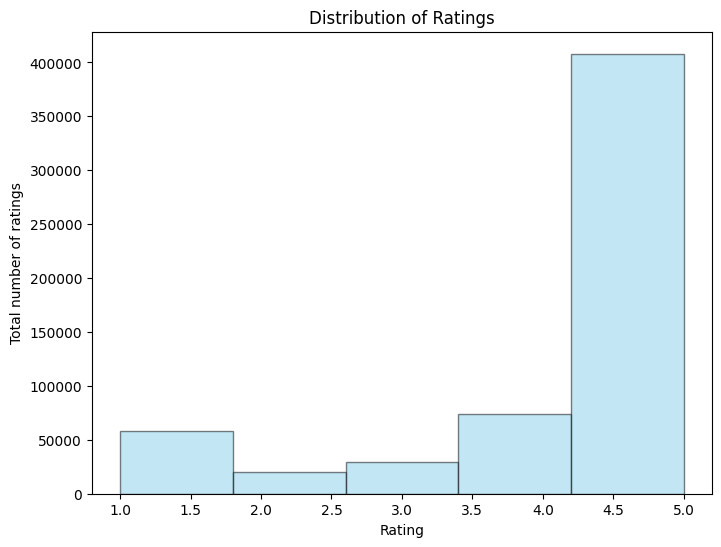

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(cdata['overall'], bins=5, alpha=0.5, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Total number of ratings')
plt.title('Distribution of Ratings')
plt.grid(False)
plt.show()

In [28]:
review_counts = cdata.groupby('reviewerID')['overall'].count().sort_values(ascending=False)
review_counts.describe()

count    514945.000000
mean          1.146150
std           0.550772
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          72.000000
Name: overall, dtype: float64

In [29]:
sum(review_counts>=5)

1378

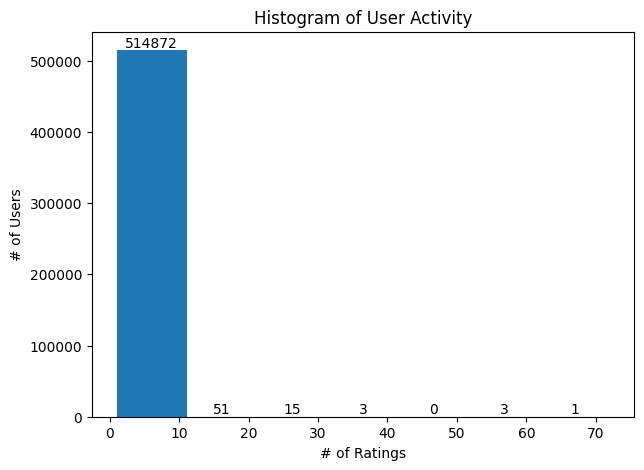

In [30]:
plt.figure(figsize=(7,5))
_, _, bars = plt.hist(review_counts, bins=7)
plt.bar_label(bars)
plt.title('Histogram of User Activity')
plt.xlabel('# of Ratings')
plt.ylabel('# of Users')
plt.show()

In [31]:
average_ratings = cdata.groupby(["title"])["overall"].mean()
average_ratings.nlargest(5)

title
 316407400 Frigidaire Range Glide                      5.0
 3348552 Whirlpool Washer Hose, Pump To Drain          5.0
 3957749 DRYER KNOB WHIRLPOOL ROPER USED PART fc       5.0
 53709-28 Maytag Refrigerator Hinge Upper Dr           5.0
 8544935 WASHER CONTROL KNOB WHIRLPOOL USED PART fc    5.0
Name: overall, dtype: float64

### Data Preperation for Extracting Sentiment from Review Text Data

In [32]:
from string import punctuation

print(punctuation)

# get rid of punctuation
reviews = cdata.reviewText.str.lower() # lowercase, standardize
all_text = cdata.reviewText.apply(lambda reviews: ''.join([c for c in str(reviews) if c not in punctuation]))
all_text = cdata['reviewText'].str.cat(sep=' ')

# split by new lines and spaces
reviews_split = all_text.split('\n')
all_text = ' '.join(reviews_split)

# create a list of words
words = all_text.split()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [33]:
from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
# print(vocab)


vocab_to_int = {value: index for index, value in enumerate(vocab)}

print('Number of rows before removing NaN from reviewText column:', cdata.shape[0])
cdata = cdata.dropna(subset=['reviewText'])
print('Number of rows after removing NaN from reviewText column:', cdata.shape[0])
cdata['review_ints'] = cdata.reviewText.apply(lambda  review: [vocab_to_int[word] for word in str(review).split()])
cdata.head()

Number of rows before removing NaN from reviewText column: 590204
Number of rows after removing NaN from reviewText column: 589885


<ipython-input-33-196af0bd6b5a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata['review_ints'] = cdata.reviewText.apply(lambda  review: [vocab_to_int[word] for word in str(review).split()])


,reviewerID,asin,overall,unixReviewTime,reviewText,title,brand,review_ints
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[183, 45, 3, 132, 8, 12, 805, 939, 5447, 11482..."
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,this particular type is perfect and easily ada...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[11, 1568, 797, 6, 106, 1, 365, 23006, 2, 369,..."
4,AVP16JFIT6LPL,B00002N7IL,5.0,1521504000,excellent,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,[552]
6,A2J2T9LX2HC947,B00002N7IL,5.0,1507939200,Yea baby,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[16786, 2258]"
8,AJN26F4KMWD59,B00002N7IL,5.0,1501459200,Well made and works well,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[900, 148, 1, 41, 78]"


In [34]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))  # should ~ 74000+

Unique words:  299842


In [35]:
# outlier review stats
count_empty_lists = cdata['review_ints'].apply(len).eq(0).sum()
print(count_empty_lists)
# There is no review with length zero

0


In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### SENTIMENT RNN MODEL CLASS

In [37]:
# Using Loaded Sentiment Model to get Sentiment of reviews and remove discrepancy of reviews and ratings
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)

        self.dropout = nn.Dropout(0.3)

        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()


    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)


        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        lstm_out = lstm_out[:, -1, :] # getting the last time step output


        out = self.dropout(lstm_out)
        out = self.fc(out)

        sig_out = self.sig(out)
        return sig_out, hidden


    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden


vocab_size = 74073 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers).to(device)

print(net)

SentimentRNN(
  (embedding): Embedding(74073, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [41]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

# Loading Sentiment Model
net.load_state_dict(torch.load('sentiment_model.pth'))

from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int.get(word, 0) for word in test_words])

    return test_ints

def pad_features_prev(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's
        or truncated to the input seq_length.
    '''

    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    for i, row in enumerate(reviews_ints):
        if len(row) > 0:
            features[i, -len(row):] = np.array(row)[:seq_length]

    return features


def predict(net, test_review, sequence_length=200):

    net.eval()

    # tokenize review
    test_ints = tokenize_review(test_review)

    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features_prev(test_ints, seq_length)

    # convert to tensor to pass into model
    feature_tensor = torch.from_numpy(features)

    batch_size = feature_tensor.size(0)

    # initialize hidden state
    h = net.init_hidden(batch_size)

    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()

    # get the output from the model
    output, h = net(feature_tensor, h)

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())
    # printing output value, before rounding
    # print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    return output.item()

import numpy as np

# read data from text files
with open('reviews.txt', 'r') as f:
    reviews = f.read()

from string import punctuation

print(punctuation)

# get rid of punctuation
reviews = reviews.lower() # lowercase, standardize
all_text = ''.join([c for c in reviews if c not in punctuation])

# split by new lines and spaces
reviews_split = all_text.split('\n')
all_text = ' '.join(reviews_split)

# create a list of words
words = all_text.split()


from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
# print(vocab)

vocab_to_int = {value: index for index, value in enumerate(vocab)}

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints (which is a list)
reviews_ints = []
for review in reviews_split:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])

Training on GPU.
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [42]:
# Addin a column with sentiment of all reviews
cdata['review_sentiment'] = cdata['reviewText'].apply(lambda x: predict(net, str(x), 200))
cdata.head()

<ipython-input-42-e483d7c86673>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata['review_sentiment'] = cdata['reviewText'].apply(lambda x: predict(net, str(x), 200))


,reviewerID,asin,overall,unixReviewTime,reviewText,title,brand,review_ints,review_sentiment
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[183, 45, 3, 132, 8, 12, 805, 939, 5447, 11482...",0.995139
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,this particular type is perfect and easily ada...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[11, 1568, 797, 6, 106, 1, 365, 23006, 2, 369,...",0.988890
4,AVP16JFIT6LPL,B00002N7IL,5.0,1521504000,excellent,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,[552],0.579963
6,A2J2T9LX2HC947,B00002N7IL,5.0,1507939200,Yea baby,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[16786, 2258]",0.406393
8,AJN26F4KMWD59,B00002N7IL,5.0,1501459200,Well made and works well,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[900, 148, 1, 41, 78]",0.927727


### Standardizing Data by Overall Rating Mapping

In [43]:
def get_sentiment_rating(num):
  if num >= 0.8:
    return 5
  elif num >= 0.6:
    return 4
  elif num >= 0.4:
    return 3
  elif num >= 0.2:
    return 2
  else:
    return 1

cdata['sentiment_rating'] = cdata['review_sentiment'].apply(get_sentiment_rating)
cdata.head()

<ipython-input-43-22cb2ad00f56>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata['sentiment_rating'] = cdata['review_sentiment'].apply(get_sentiment_rating)


,reviewerID,asin,overall,unixReviewTime,reviewText,title,brand,review_ints,review_sentiment,sentiment_rating
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[183, 45, 3, 132, 8, 12, 805, 939, 5447, 11482...",0.995139,5
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,this particular type is perfect and easily ada...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[11, 1568, 797, 6, 106, 1, 365, 23006, 2, 369,...",0.988890,5
4,AVP16JFIT6LPL,B00002N7IL,5.0,1521504000,excellent,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,[552],0.579963,3
6,A2J2T9LX2HC947,B00002N7IL,5.0,1507939200,Yea baby,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[16786, 2258]",0.406393,3
8,AJN26F4KMWD59,B00002N7IL,5.0,1501459200,Well made and works well,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[900, 148, 1, 41, 78]",0.927727,5


In [44]:
# Saving df checkpoint
cdata_orig = cdata.copy()
cdata_orig.to_csv('appliances_checkpoint.csv')

### Detecting discrepancies in Review Text and Rating of a User

In [45]:
def get_rating_discrepancy(cdata):
  if cdata.overall - cdata.sentiment_rating == 4:
    return True
  elif cdata.sentiment_rating - cdata.overall == 4:
    return True
  return False
cdata['rating_discrepancy'] = cdata.apply(get_rating_discrepancy, axis = 1)
cdata.head()

<ipython-input-45-d84f72cf387a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata['rating_discrepancy'] = cdata.apply(get_rating_discrepancy, axis = 1)


,reviewerID,asin,overall,unixReviewTime,reviewText,title,brand,review_ints,review_sentiment,sentiment_rating,rating_discrepancy
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[183, 45, 3, 132, 8, 12, 805, 939, 5447, 11482...",0.995139,5,False
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,this particular type is perfect and easily ada...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[11, 1568, 797, 6, 106, 1, 365, 23006, 2, 369,...",0.988890,5,False
4,AVP16JFIT6LPL,B00002N7IL,5.0,1521504000,excellent,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,[552],0.579963,3,False
6,A2J2T9LX2HC947,B00002N7IL,5.0,1507939200,Yea baby,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[16786, 2258]",0.406393,3,False
8,AJN26F4KMWD59,B00002N7IL,5.0,1501459200,Well made and works well,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[900, 148, 1, 41, 78]",0.927727,5,False


In [46]:
cdata = cdata[cdata['rating_discrepancy'] == False]

In [47]:
# Converting Review Text to Embeddings to be used for Training
def pad_features(review_ints, seq_length):
    features = np.zeros(seq_length, dtype=int)
    if len(review_ints)>seq_length:
      return review_ints[:seq_length]

    num = len(review_ints)
    # print(num)
    for i in review_ints:
        features[seq_length-num] = i
        num = num - 1
    # print(features)

    return features

# Apply the pad_features function to the 'reviews_ints' column
seq_length = 200
cdata['features'] = cdata['review_ints'].apply(lambda x: pad_features(x, seq_length=seq_length))

# Access the 'features' column in the resulting DataFrame
features_column = cdata['features']

In [48]:
itemnum_2_itemid = list(cdata['asin'].unique())
itemnum_2_itemid.sort()
itemid_2_itemnum = {c:i for i,c in enumerate(itemnum_2_itemid)}
cdata['asin_id'] = cdata['asin'].apply(lambda x: itemid_2_itemnum[x])

In [49]:
cdata.head(2)

,reviewerID,asin,overall,unixReviewTime,reviewText,title,brand,review_ints,review_sentiment,sentiment_rating,rating_discrepancy,features,asin_id
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[183, 45, 3, 132, 8, 12, 805, 939, 5447, 11482...",0.995139,5,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,this particular type is perfect and easily ada...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[11, 1568, 797, 6, 106, 1, 365, 23006, 2, 369,...",0.988890,5,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6


In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cdata['reviewerID'] = label_encoder.fit_transform(cdata['reviewerID'])

cdata.head(2)

,reviewerID,asin,overall,unixReviewTime,reviewText,title,brand,review_ints,review_sentiment,sentiment_rating,rating_discrepancy,features,asin_id
0,342982,B00002N7IL,5.0,1426809600,Just what I needed for my electric range. Matc...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[183, 45, 3, 132, 8, 12, 805, 939, 5447, 11482...",0.995139,5,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
2,346531,B00002N7IL,5.0,1522022400,this particular type is perfect and easily ada...,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,"[11, 1568, 797, 6, 106, 1, 365, 23006, 2, 369,...",0.988890,5,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6


In [51]:
def check_ratings_num(df):
    item_num = set(df['asin_id'])
    if item_num == set(range(len(item_num))):
        return True
    else:
        return False

check_ratings_num(cdata)

True

In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [53]:
def df_2_tensor(df, device):
    user_num = np.asarray(df['reviewerID'])
    item_num = np.asarray(df['asin_id'])
    rating = np.asarray(df['overall'])
    review = np.asarray(df['features'].apply(lambda x: np.array(x)).tolist())
    return torch.from_numpy(user_num).to(device), torch.from_numpy(item_num).to(device), torch.from_numpy(rating).to(device), torch.from_numpy(review).to(device)

#### Splitting into Train Set, Validation Set and Test Set

In [54]:
from sklearn.model_selection import train_test_split

ratings_trainval, ratings_test = train_test_split(cdata, test_size=0.1, random_state=42)
ratings_train, ratings_val = train_test_split(ratings_trainval, test_size=0.1, random_state=42)

In [55]:
train_user_num, train_item_num, train_rating, train_review = df_2_tensor(ratings_train,device)

In [56]:
val_user_num, val_item_num, val_rating, val_review = df_2_tensor(ratings_val,device)
test_user_num, test_item_num, test_rating, test_review = df_2_tensor(ratings_test,device)

In [57]:
def tensor_2_dataset(user,item,rating, review):
    return list(zip(user,item,rating,review))

def make_dataloader(dataset,bs,shuffle):
    return torch.utils.data.DataLoader(dataset,batch_size=bs,shuffle=shuffle)

In [58]:
train_dataset = tensor_2_dataset(train_user_num,train_item_num, train_rating, train_review)
val_dataset = tensor_2_dataset(val_user_num,val_item_num,val_rating, val_review)
test_dataset = tensor_2_dataset(test_user_num, test_item_num, test_rating, test_review)

In [59]:
train_dataloader = make_dataloader(train_dataset,1024,True)
val_dataloader = make_dataloader(val_dataset,1024, False)
test_dataloader = make_dataloader(test_dataset,1024,False)

In [60]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Creating Classes for Weights and Bias Embeddings

In [61]:
class ScaledEmbedding(nn.Embedding):
    def reset_parameters(self):
        self.weight.data.normal_(0, 1.0 / self.embedding_dim)
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)


class ZeroEmbedding(nn.Embedding):
    def reset_parameters(self):
        self.weight.data.zero_()
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)

In [62]:
class DotModel(nn.Module):

    def __init__(self,
                 num_users,
                 num_items,
                 embedding_dim=32):

        super(DotModel, self).__init__()

        self.embedding_dim = embedding_dim
        self.user_embeddings = ScaledEmbedding(num_users, embedding_dim)
        self.item_embeddings = ScaledEmbedding(num_items, embedding_dim)
        self.user_biases = ZeroEmbedding(num_users, 1)
        self.item_biases = ZeroEmbedding(num_items, 1)


    def forward(self, user_ids, item_ids):
        user_embedding = self.user_embeddings(user_ids)
        item_embedding = self.item_embeddings(item_ids)

        user_bias = self.user_biases(user_ids).squeeze()
        item_bias = self.item_biases(item_ids).squeeze()

        dot = torch.mul(user_embedding, item_embedding).sum(1)
        res = dot + user_bias + item_bias

        return res

In [63]:
total_user_id = len(cdata['reviewerID'].unique())
total_item_id = len(cdata['asin'].unique())
net = DotModel(total_user_id,total_item_id).to(device)
net

DotModel(
  (user_embeddings): ScaledEmbedding(465759, 32)
  (item_embeddings): ScaledEmbedding(29158, 32)
  (user_biases): ZeroEmbedding(465759, 1)
  (item_biases): ZeroEmbedding(29158, 1)
)

In [64]:
batch_user, batch_item, batch_rating, batch_review = next(iter(train_dataloader))
batch_user, batch_item, batch_rating, batch_review = batch_user.to(device), batch_item.to(device), batch_rating.to(device), batch_review.to(device)

In [65]:
predictions = net(batch_user, batch_item)
predictions.shape

torch.Size([1024])

In [66]:
def regression_loss(predicted_ratings, observed_ratings):
    return ((observed_ratings - predicted_ratings) ** 2).mean()

In [67]:
loss=regression_loss(predictions,batch_rating)
loss

tensor(20.1225, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)

In [68]:
class FactorizationModel(object):

    def __init__(self, embedding_dim=32, n_iter=10, l2=0.0,
                 learning_rate=1e-2, device=device, net=None, num_users=None,
                 num_items=None,random_state=None):

        self._embedding_dim = embedding_dim
        self._n_iter = n_iter
        self._learning_rate = learning_rate
        self._l2 = l2
        self._device = device
        self._num_users = num_users
        self._num_items = num_items
        self._net = net
        self._optimizer = None
        self._loss_func = None
        self._random_state = random_state or np.random.RandomState()


    def _initialize(self):
        if self._net is None:
            self._net = DotModel(self._num_users, self._num_items, self._embedding_dim).to(self._device)

        self._optimizer = optim.Adam(
                self._net.parameters(),
                lr=self._learning_rate,
                weight_decay=self._l2
            )

        self._loss_func = regression_loss

    @property
    def _initialized(self):
        return self._optimizer is not None


    def fit(self, dataloader, val_dataloader, verbose=True):
        if not self._initialized:
            self._initialize()

        valid_loss_min = np.Inf
        train_losses, valid_losses, valid_maes =[], [], []

        for epoch_num in range(self._n_iter):
            tot_train_loss = 0.0
            self._net.train()
            for batch_user, batch_item, batch_rating, batch_review in dataloader:

                bath_user=batch_user.to(device)
                batch_item=batch_item.to(device)
                batch_rating=batch_rating.to(device)
                batch_review = batch_review.to(device)

                #1. Compute the output
                predictions = self._net(batch_user,batch_item)
                #2. Compute the loss
                #loss = self._loss_func(predictions,batch_rating)
                loss = self._loss_func(predictions,batch_rating)
                # 3. Zero out the gradient
                self._optimizer.zero_grad()
                # 4. Backward pass, compute the new gradients
                loss.backward()
                # 5. Update the weights
                self._optimizer.step()

                tot_train_loss += loss.item()


            train_loss = tot_train_loss /len(dataloader)
            # Go to the validation loop
            valid_loss, valid_mae = self.test(val_dataloader)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_maes.append(valid_mae)

            if verbose:
                print('Epoch {}: loss_train {}, loss_val {}'.format(epoch_num, train_loss,valid_loss))

            if np.isnan(train_loss) or train_loss == 0.0:
                raise ValueError('Degenerate train loss: {}'.format(train_loss))


            if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
              torch.save(self._net.state_dict(), 'model_cf.pt')
              valid_loss_min = valid_loss

        return train_losses, valid_losses, valid_maes


    def test(self,dataloader, verbose = False):
        self._net.eval()
        L1loss = torch.nn.L1Loss()
        tot_test_loss = 0.0
        tot_test_mae = 0.0


        with torch.no_grad():
          for batch_user, batch_item, batch_rating, batch_review in dataloader:
            #1. compute the output
            predictions = self._net(batch_user,batch_item)
            #2. Compute the loss
            loss = self._loss_func(predictions,batch_rating)

            tot_test_loss += loss.item()
            tot_test_mae += L1loss(predictions,batch_rating.type(torch.FloatTensor).to(device))


        test_loss = tot_test_loss / len(dataloader)
        test_mae = tot_test_mae / len(dataloader)
        if verbose:
            print(f"RMSE: {np.sqrt(test_loss)}, MAE: {test_mae}")
        return test_loss, test_mae

In [ ]:
model = FactorizationModel(embedding_dim=32,  # latent dimensionality
                                   n_iter=10,  # number of epochs of training
                                   learning_rate=0.001,
                                   l2=1e-8,  # strength of L2 regularization
                                   num_users=total_user_id,
                                   num_items=total_item_id)

In [ ]:
train_losses,valid_losses,valid_maes = model.fit(train_dataloader,val_dataloader)

Epoch 0: loss_train 18.91098444371203, loss_val 18.031682387730903
Validation loss decreased (inf --> 18.031682).  Saving model ...
Epoch 1: loss_train 16.726443020772425, loss_val 16.26962295329925
Validation loss decreased (18.031682 --> 16.269623).  Saving model ...
Epoch 2: loss_train 13.376183154571283, loss_val 14.646866715438358
Validation loss decreased (16.269623 --> 14.646867).  Saving model ...
Epoch 3: loss_train 9.240400350246059, loss_val 13.492332383628257
Validation loss decreased (14.646867 --> 13.492332).  Saving model ...
Epoch 4: loss_train 5.7754672154809, loss_val 12.791350618319543
Validation loss decreased (13.492332 --> 12.791351).  Saving model ...
Epoch 5: loss_train 3.5757147672546186, loss_val 12.39890137400653
Validation loss decreased (12.791351 --> 12.398901).  Saving model ...
Epoch 6: loss_train 2.2905262118145164, loss_val 12.170269191465863
Validation loss decreased (12.398901 --> 12.170269).  Saving model ...
Epoch 7: loss_train 1.5158897456394786, 

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

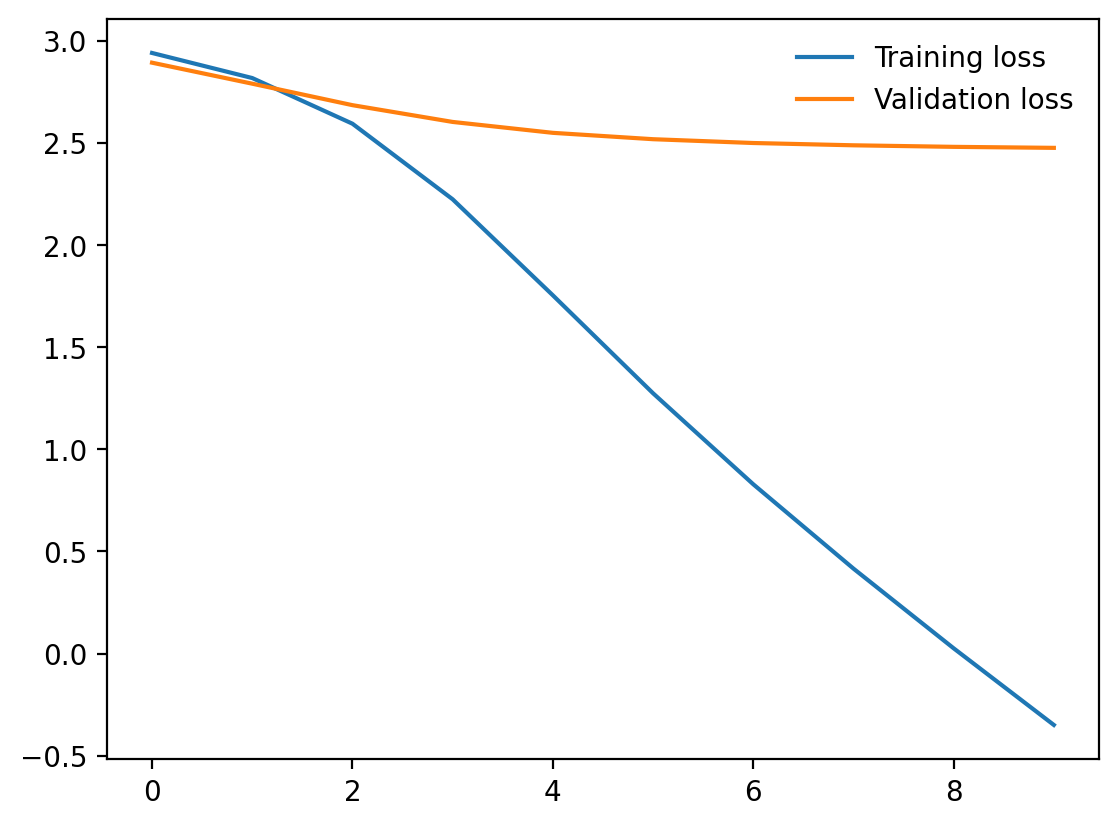

In [ ]:
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)

In [ ]:
model._net.load_state_dict(torch.load('model_cf.pt'))

<All keys matched successfully>

In [ ]:
test_loss, test_mae = model.test(test_dataloader,True)

RMSE: 3.4445370288950756, MAE: 3.0983245372772217


TUNING

Epoch 0: loss_train 12.608519790005321, loss_val 7.741277748544608
Validation loss decreased (inf --> 7.741278).  Saving model ...
Epoch 1: loss_train 2.7260146141137884, loss_val 6.3373929821162385
Validation loss decreased (7.741278 --> 6.337393).  Saving model ...
Epoch 2: loss_train 0.8442053679162435, loss_val 5.980629416772929
Validation loss decreased (6.337393 --> 5.980629).  Saving model ...
Epoch 3: loss_train 0.5938832640207354, loss_val 5.7113665508010305
Validation loss decreased (5.980629 --> 5.711367).  Saving model ...
Epoch 4: loss_train 0.48409209778403867, loss_val 5.437130645003068
Validation loss decreased (5.711367 --> 5.437131).  Saving model ...
Epoch 5: loss_train 0.41808341249530667, loss_val 5.209460520878432
Validation loss decreased (5.437131 --> 5.209461).  Saving model ...
Epoch 6: loss_train 0.42039454502677126, loss_val 4.942044444270452
Validation loss decreased (5.209461 --> 4.942044).  Saving model ...
Epoch 7: loss_train 0.3942875008973813, loss_val

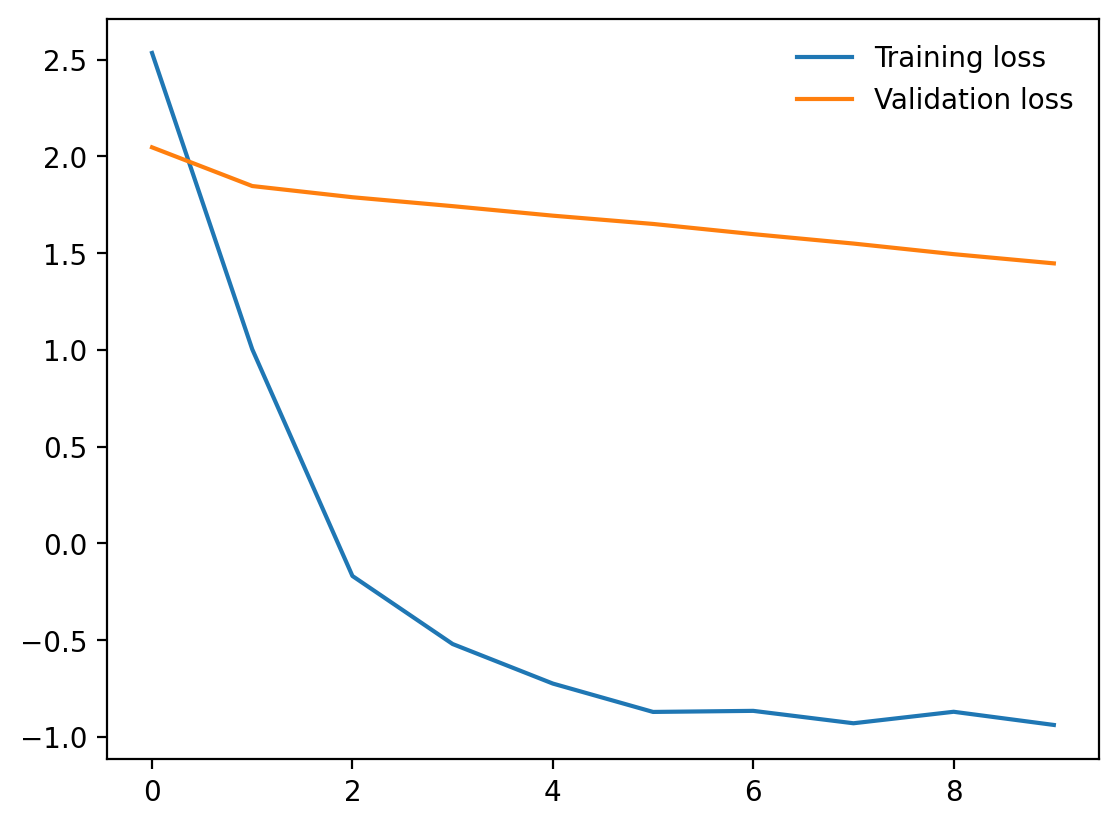

In [ ]:
# trial: 2
model = FactorizationModel(embedding_dim=32,
                                   n_iter=10,
                                   learning_rate=0.01,
                                   l2=1e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 12.622033038396632, loss_val 7.747667935466327
Validation loss decreased (inf --> 7.747668).  Saving model ...
Epoch 1: loss_train 2.6928150750671014, loss_val 6.3064392150086155
Validation loss decreased (7.747668 --> 6.306439).  Saving model ...
Epoch 2: loss_train 0.7512126602132345, loss_val 5.987542325300795
Validation loss decreased (6.306439 --> 5.987542).  Saving model ...
Epoch 3: loss_train 0.5590586331842757, loss_val 5.726289958208288
Validation loss decreased (5.987542 --> 5.726290).  Saving model ...
Epoch 4: loss_train 0.4779740247202503, loss_val 5.458358776862469
Validation loss decreased (5.726290 --> 5.458359).  Saving model ...
Epoch 5: loss_train 0.4274075177202714, loss_val 5.2233046126555704
Validation loss decreased (5.458359 --> 5.223305).  Saving model ...
Epoch 6: loss_train 0.43189543485922927, loss_val 4.945287387333229
Validation loss decreased (5.223305 --> 4.945287).  Saving model ...
Epoch 7: loss_train 0.403589385157459, loss_val 4.

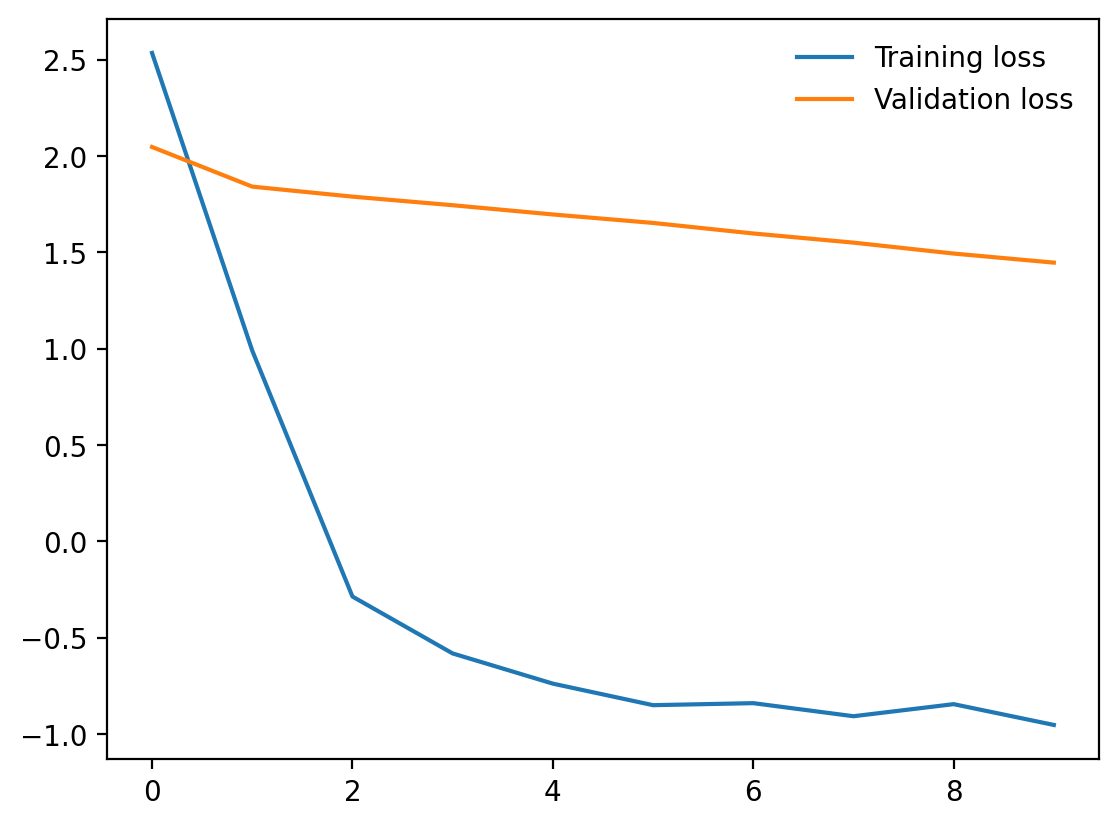

In [ ]:
# trial: 3
model = FactorizationModel(embedding_dim=32,
                                   n_iter=10,
                                   learning_rate=0.01,
                                   l2=1e-9,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 12.6087993889933, loss_val 7.738387043172792
Validation loss decreased (inf --> 7.738387).  Saving model ...
Epoch 1: loss_train 2.7657052558768473, loss_val 6.3530360274120135
Validation loss decreased (7.738387 --> 6.353036).  Saving model ...
Epoch 2: loss_train 0.9884087591227142, loss_val 5.960696869003765
Validation loss decreased (6.353036 --> 5.960697).  Saving model ...
Epoch 3: loss_train 0.6331926755745475, loss_val 5.680877008923878
Validation loss decreased (5.960697 --> 5.680877).  Saving model ...
Epoch 4: loss_train 0.4960598051353587, loss_val 5.410566009887998
Validation loss decreased (5.680877 --> 5.410566).  Saving model ...
Epoch 5: loss_train 0.4424785978244406, loss_val 5.174329136649553
Validation loss decreased (5.410566 --> 5.174329).  Saving model ...
Epoch 6: loss_train 0.42196125954105534, loss_val 4.920114699432564
Validation loss decreased (5.174329 --> 4.920115).  Saving model ...
Epoch 7: loss_train 0.391705118633624, loss_val 4.673

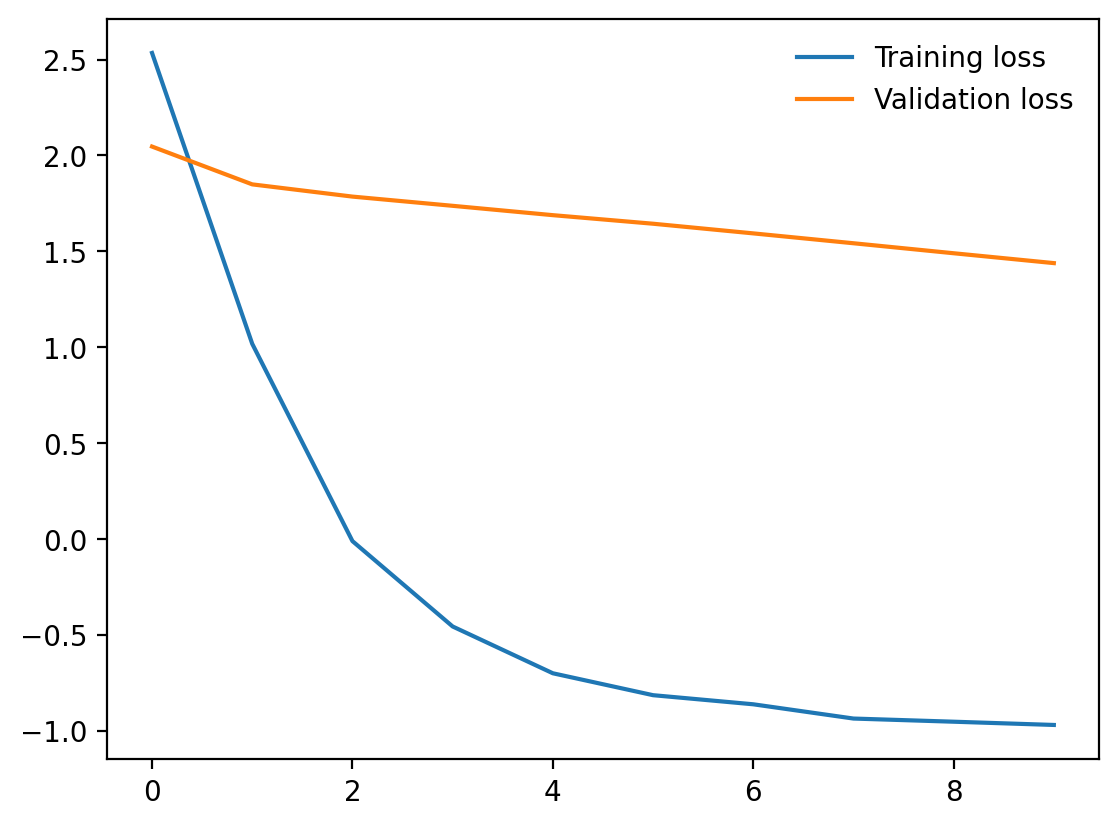

In [ ]:
# trial: 4
model = FactorizationModel(embedding_dim=32,
                                   n_iter=10,
                                   learning_rate=0.01,
                                   l2=2e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 12.571854715771277, loss_val 7.701303043284969
Validation loss decreased (inf --> 7.701303).  Saving model ...
Epoch 1: loss_train 2.4055185803609116, loss_val 6.6943188538552105
Validation loss decreased (7.701303 --> 6.694319).  Saving model ...
Epoch 2: loss_train 1.167326860130853, loss_val 6.241384681346832
Validation loss decreased (6.694319 --> 6.241385).  Saving model ...
Epoch 3: loss_train 1.3023367152986174, loss_val 5.879836255677208
Validation loss decreased (6.241385 --> 5.879836).  Saving model ...
Epoch 4: loss_train 0.9215434951205815, loss_val 5.505118442741386
Validation loss decreased (5.879836 --> 5.505118).  Saving model ...
Epoch 5: loss_train 0.6829760839382905, loss_val 5.193829840317393
Validation loss decreased (5.505118 --> 5.193830).  Saving model ...
Epoch 6: loss_train 0.6205356547903903, loss_val 4.893380733551706
Validation loss decreased (5.193830 --> 4.893381).  Saving model ...
Epoch 7: loss_train 0.6012501576407951, loss_val 4.62

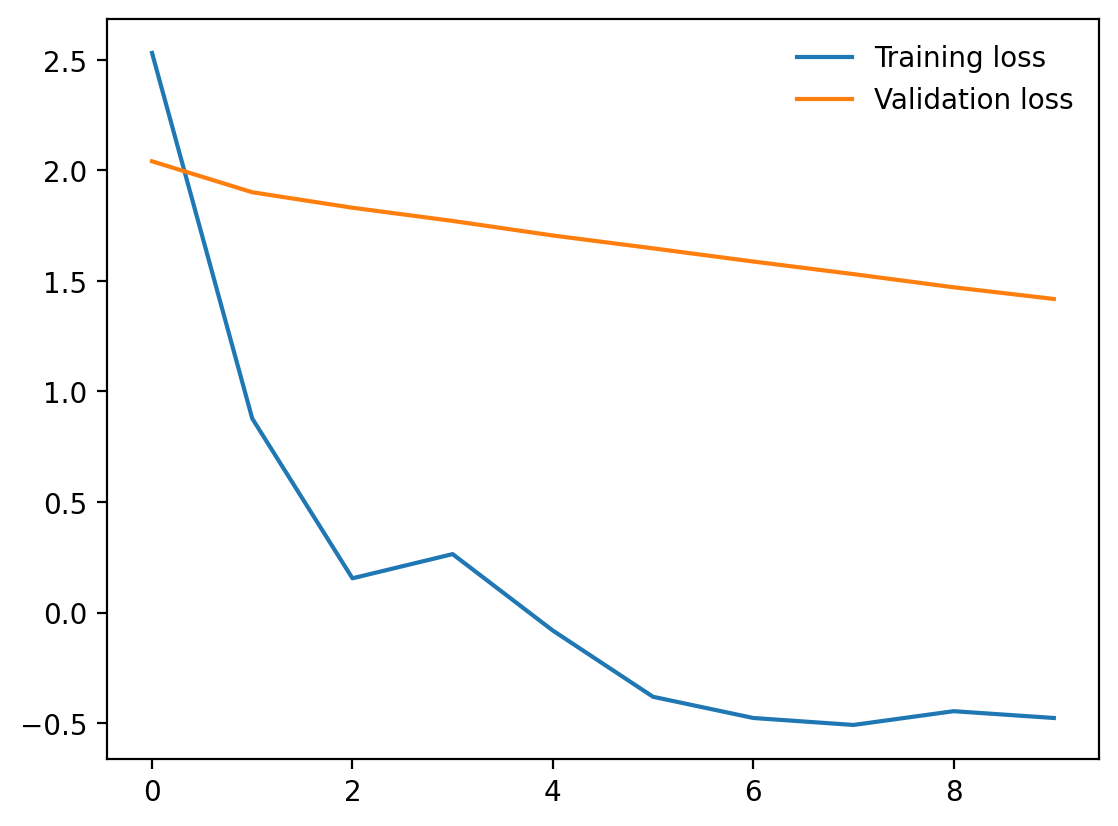

In [ ]:
# trial: 5
model = FactorizationModel(embedding_dim=64,
                                   n_iter=10,
                                   learning_rate=0.01,
                                   l2=1e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 7.842892500949196, loss_val 4.323073964626164
Validation loss decreased (inf --> 4.323074).  Saving model ...
Epoch 1: loss_train 9.901447212080624, loss_val 4.064678135758219
Validation loss decreased (4.323074 --> 4.064678).  Saving model ...
Epoch 2: loss_train 13.997427666080219, loss_val 3.709635100181269
Validation loss decreased (4.064678 --> 3.709635).  Saving model ...
Epoch 3: loss_train 16.54993195205068, loss_val 3.5836899117299272
Validation loss decreased (3.709635 --> 3.583690).  Saving model ...
Epoch 4: loss_train 10.58188139741459, loss_val 3.410827311449931
Validation loss decreased (3.583690 --> 3.410827).  Saving model ...
Epoch 5: loss_train 10.29996233540237, loss_val 3.39816416723245
Validation loss decreased (3.410827 --> 3.398164).  Saving model ...
Epoch 6: loss_train 10.46624176468688, loss_val 3.4590853093825182
Epoch 7: loss_train 10.761196945042634, loss_val 3.469468162330537
Epoch 8: loss_train 10.640766192069922, loss_val 3.435168691

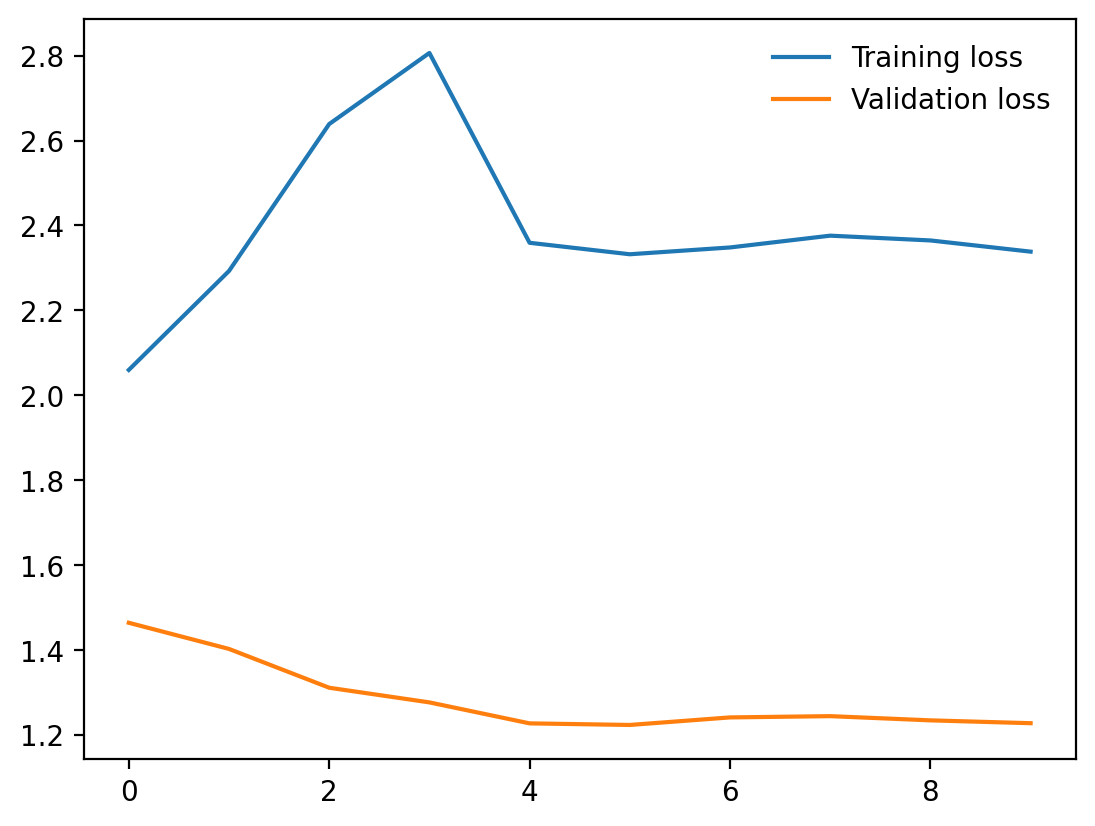

In [ ]:
# trial: 6
model = FactorizationModel(embedding_dim=64,
                                   n_iter=10,
                                   learning_rate=0.03,
                                   l2=2e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 18.921307757230185, loss_val 17.896564539680472
Validation loss decreased (inf --> 17.896565).  Saving model ...
Epoch 1: loss_train 15.81498047940852, loss_val 15.718665867743674
Validation loss decreased (17.896565 --> 15.718666).  Saving model ...
Epoch 2: loss_train 10.11119856698346, loss_val 14.2199847662127
Validation loss decreased (15.718666 --> 14.219985).  Saving model ...
Epoch 3: loss_train 4.993321808638939, loss_val 13.560698051274672
Validation loss decreased (14.219985 --> 13.560698).  Saving model ...
Epoch 4: loss_train 2.488539317956145, loss_val 13.299579899412352
Validation loss decreased (13.560698 --> 13.299580).  Saving model ...
Epoch 5: loss_train 1.36121046281007, loss_val 13.184632655576522
Validation loss decreased (13.299580 --> 13.184633).  Saving model ...
Epoch 6: loss_train 0.7983852720425303, loss_val 13.113250547359094
Validation loss decreased (13.184633 --> 13.113251).  Saving model ...
Epoch 7: loss_train 0.4948379802116597, l

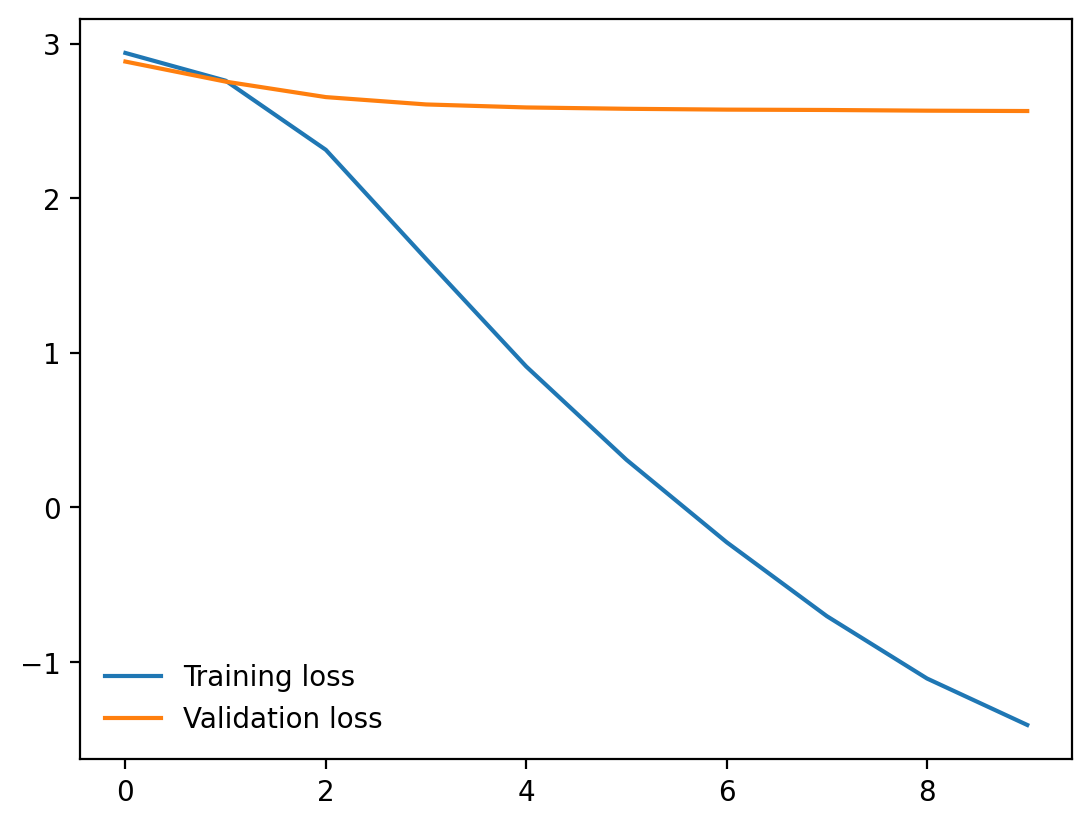

In [ ]:
# trial: 7
model = FactorizationModel(embedding_dim=64,
                                   n_iter=10,
                                   learning_rate=0.001,
                                   l2=2e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 8.629159825783573, loss_val 6.768757990729829
Validation loss decreased (inf --> 6.768758).  Saving model ...
Epoch 1: loss_train 47.8619027553581, loss_val 6.5181020927083315
Validation loss decreased (6.768758 --> 6.518102).  Saving model ...
Epoch 2: loss_train 176.8415289214937, loss_val 6.5649893907526335
Epoch 3: loss_train 160.80124583842263, loss_val 5.791226483505461
Validation loss decreased (6.518102 --> 5.791226).  Saving model ...
Epoch 4: loss_train 53.238080737809156, loss_val 5.910999257590842
Epoch 5: loss_train 44.00048653149894, loss_val 5.873512191609505
Epoch 6: loss_train 43.51580022083371, loss_val 6.249637436654095
Epoch 7: loss_train 42.33696385260333, loss_val 6.240748968091126
Epoch 8: loss_train 40.314673612880874, loss_val 6.444602956739402
Epoch 9: loss_train 38.47972000307723, loss_val 6.444616296828624
Epoch 10: loss_train 38.96704446818323, loss_val 6.339562974747684
Epoch 11: loss_train 40.719798543750514, loss_val 6.713255021782185

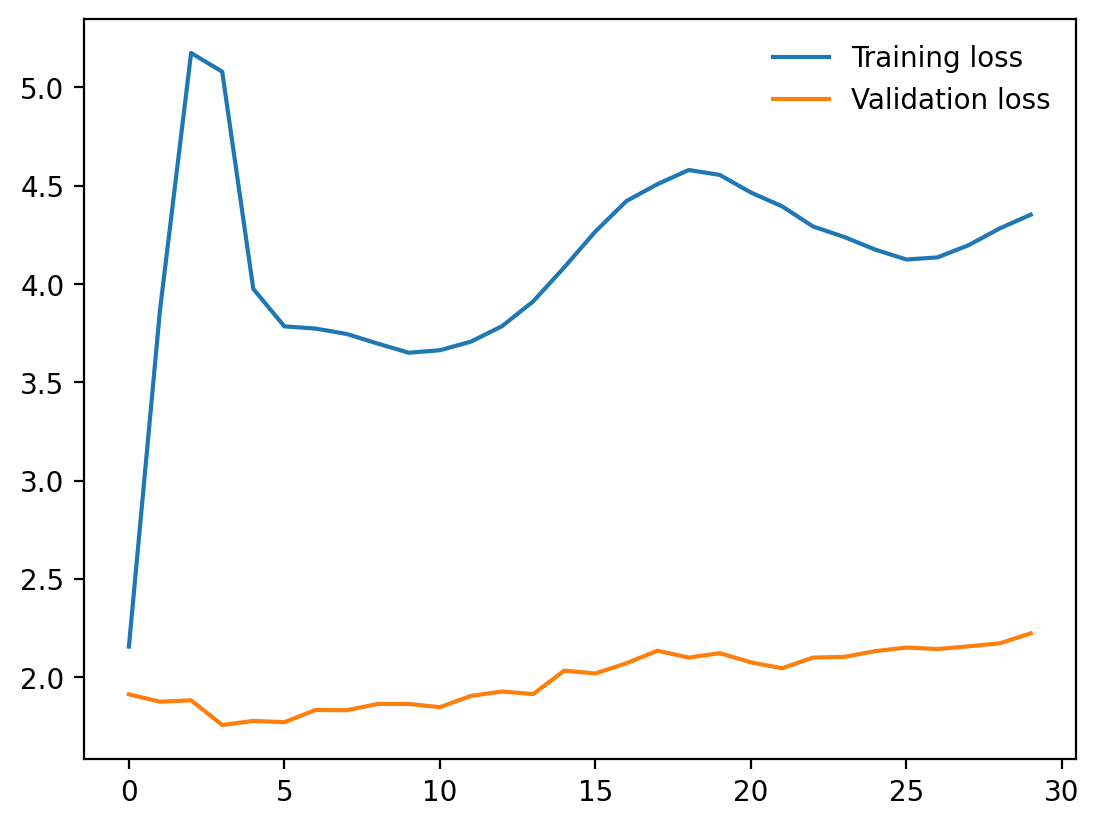

In [ ]:
# trial: 8
model = FactorizationModel(embedding_dim=128,
                                   n_iter=30,
                                   learning_rate=0.03,
                                   l2=2e-10,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 7.679641647292104, loss_val 3.7912982623893465
Validation loss decreased (inf --> 3.791298).  Saving model ...
Epoch 1: loss_train 3.5812182272317687, loss_val 3.7905226555102285
Validation loss decreased (3.791298 --> 3.790523).  Saving model ...
Epoch 2: loss_train 10.854785056603022, loss_val 3.632486761369481
Validation loss decreased (3.790523 --> 3.632487).  Saving model ...
Epoch 3: loss_train 11.650804438172132, loss_val 3.2031144230895077
Validation loss decreased (3.632487 --> 3.203114).  Saving model ...
Epoch 4: loss_train 3.9190182807207035, loss_val 3.051291094411823
Validation loss decreased (3.203114 --> 3.051291).  Saving model ...
Epoch 5: loss_train 3.0296148285108755, loss_val 2.961733000357825
Validation loss decreased (3.051291 --> 2.961733).  Saving model ...
Epoch 6: loss_train 2.78151321902248, loss_val 2.8840098724346763
Validation loss decreased (2.961733 --> 2.884010).  Saving model ...
Epoch 7: loss_train 2.760738800224997, loss_val 2.84

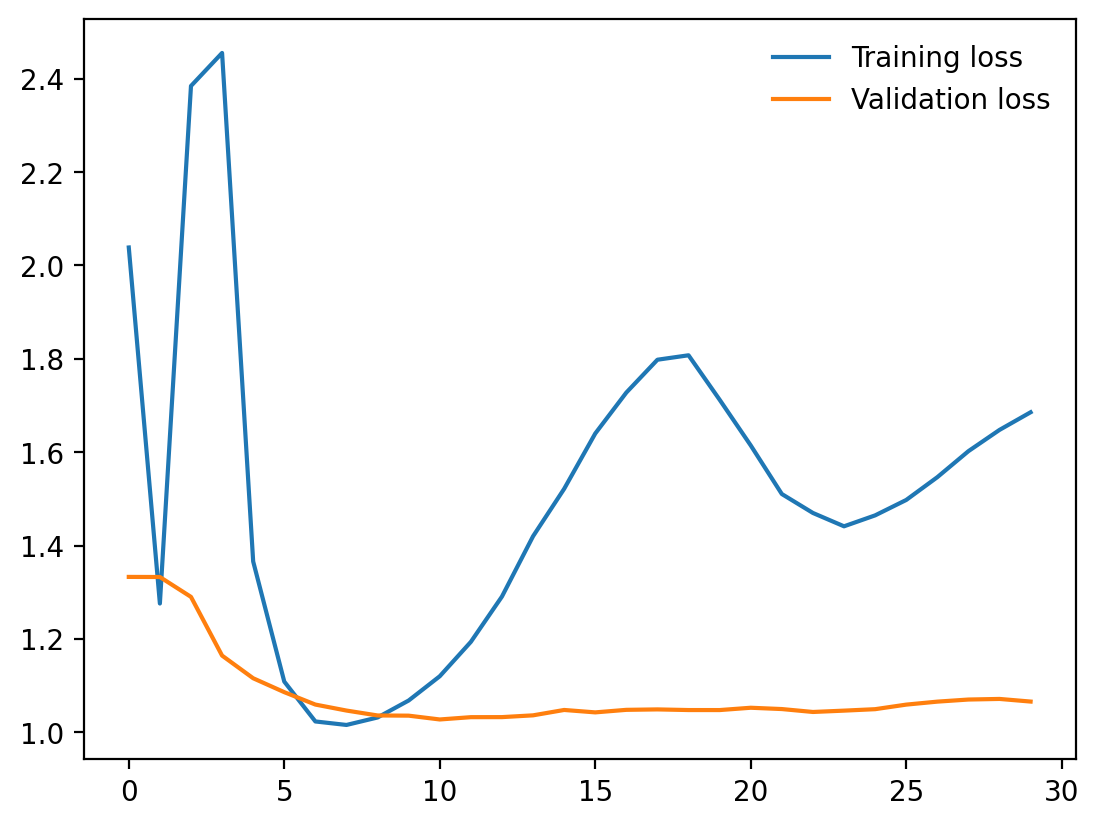

In [ ]:
# trial: 9
model = FactorizationModel(embedding_dim=32,
                                   n_iter=30,
                                   learning_rate=0.03,
                                   l2=2e-10,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 6.657881152581579, loss_val 5.256934083190813
Validation loss decreased (inf --> 5.256934).  Saving model ...
Epoch 1: loss_train 21.856435616050327, loss_val 5.268432839799676
Epoch 2: loss_train 78.1724928488625, loss_val 5.152050436438955
Validation loss decreased (5.256934 --> 5.152050).  Saving model ...
Epoch 3: loss_train 80.38548438682663, loss_val 4.828805273152155
Validation loss decreased (5.152050 --> 4.828805).  Saving model ...
Epoch 4: loss_train 27.715236530861954, loss_val 5.199525495801667
Epoch 5: loss_train 21.983823063449805, loss_val 5.123802587345038
Epoch 6: loss_train 21.04709277525392, loss_val 5.343916803733743
Epoch 7: loss_train 20.376478154380038, loss_val 5.4714336554080525
Epoch 8: loss_train 19.66200288566535, loss_val 5.29999593931823
Epoch 9: loss_train 19.219532254772673, loss_val 5.270259894782199
Epoch 10: loss_train 19.384696247859015, loss_val 5.386595206283282
Epoch 11: loss_train 19.98478360490318, loss_val 5.549421021756733

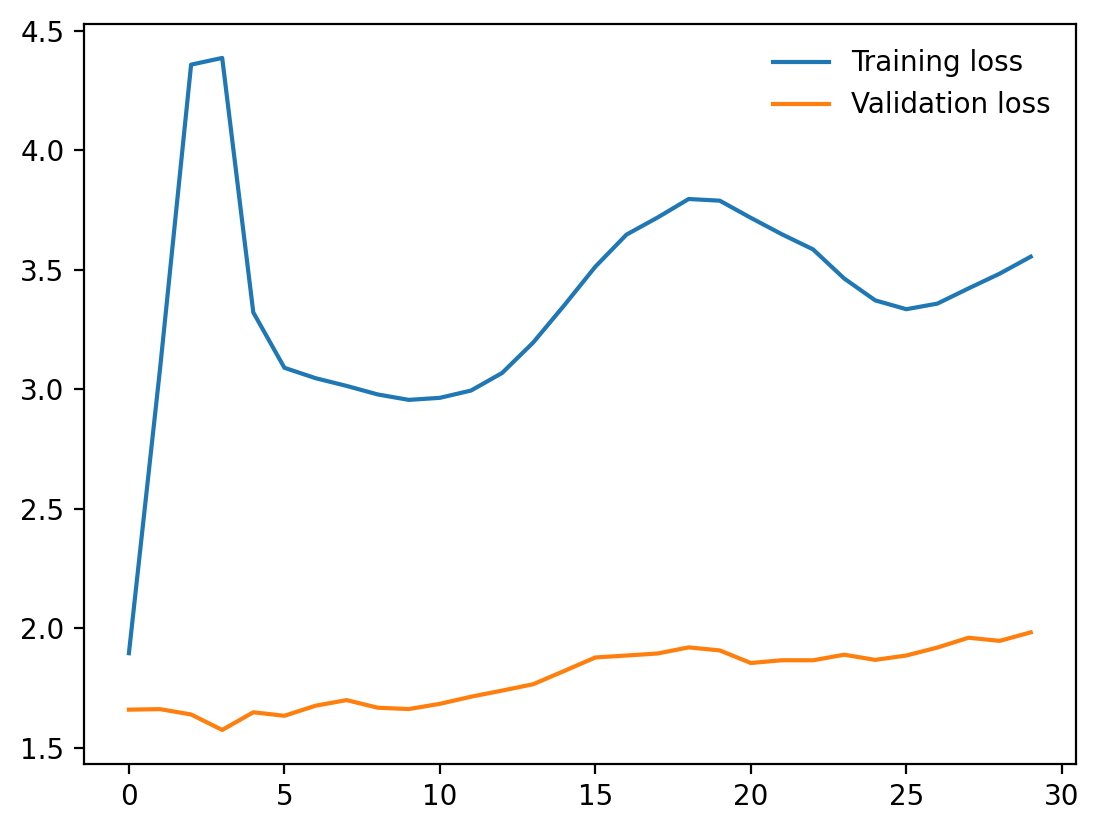

In [ ]:
# trial: 10
model = FactorizationModel(embedding_dim=32,
                                   n_iter=30,
                                   learning_rate=0.05,
                                   l2=2e-10,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 7.887533565555615, loss_val 4.460608058931904
Validation loss decreased (inf --> 4.460608).  Saving model ...
Epoch 1: loss_train 11.87021853490882, loss_val 4.550702128646718
Epoch 2: loss_train 43.15863677825852, loss_val 4.295134371176095
Validation loss decreased (4.460608 --> 4.295134).  Saving model ...
Epoch 3: loss_train 41.68547714400441, loss_val 3.8863149316499737
Validation loss decreased (4.295134 --> 3.886315).  Saving model ...
Epoch 4: loss_train 13.646728861981332, loss_val 3.8007247351080076
Validation loss decreased (3.886315 --> 3.800725).  Saving model ...
Epoch 5: loss_train 10.789765601192492, loss_val 3.8017570715173723
Epoch 6: loss_train 10.44557628558444, loss_val 3.7557674378428527
Validation loss decreased (3.800725 --> 3.755767).  Saving model ...
Epoch 7: loss_train 10.45912862619462, loss_val 3.758059187304603
Epoch 8: loss_train 10.445893506532348, loss_val 3.762703339483119
Epoch 9: loss_train 10.435724549821233, loss_val 3.78645736

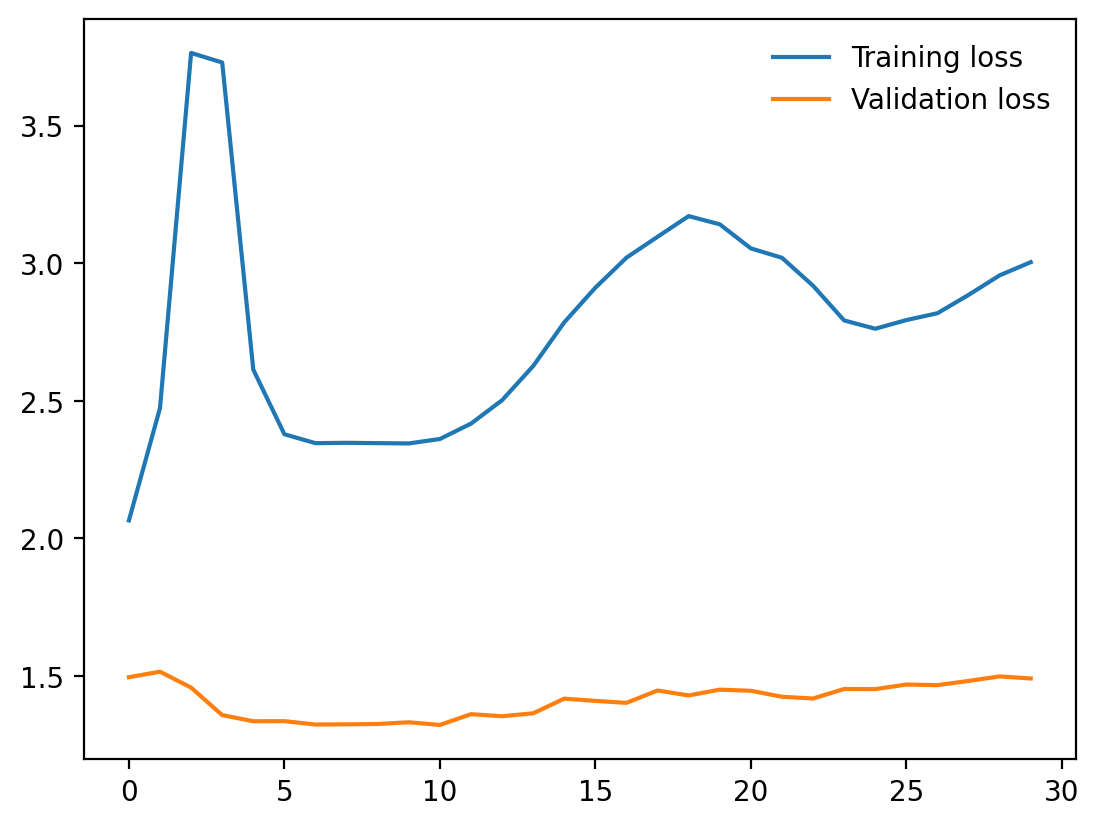

In [ ]:
# trial: 11
model = FactorizationModel(embedding_dim=64,
                                   n_iter=30,
                                   learning_rate=0.03,
                                   l2=2e-10,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 8.001067673170438, loss_val 3.7790493674702557
Validation loss decreased (inf --> 3.779049).  Saving model ...
Epoch 1: loss_train 1.6789007637694355, loss_val 3.648024776489066
Validation loss decreased (3.779049 --> 3.648025).  Saving model ...
Epoch 2: loss_train 2.7690708930885215, loss_val 3.409973038804534
Validation loss decreased (3.648025 --> 3.409973).  Saving model ...
Epoch 3: loss_train 3.0223809133508834, loss_val 3.066364264593422
Validation loss decreased (3.409973 --> 3.066364).  Saving model ...
Epoch 4: loss_train 1.4182176007179703, loss_val 2.8918428663954883
Validation loss decreased (3.066364 --> 2.891843).  Saving model ...
Epoch 5: loss_train 1.1133915117426234, loss_val 2.7635171665519147
Validation loss decreased (2.891843 --> 2.763517).  Saving model ...
Epoch 6: loss_train 0.9290751854773285, loss_val 2.6685817265765532
Validation loss decreased (2.763517 --> 2.668582).  Saving model ...
Epoch 7: loss_train 0.8905041653379507, loss_val 2

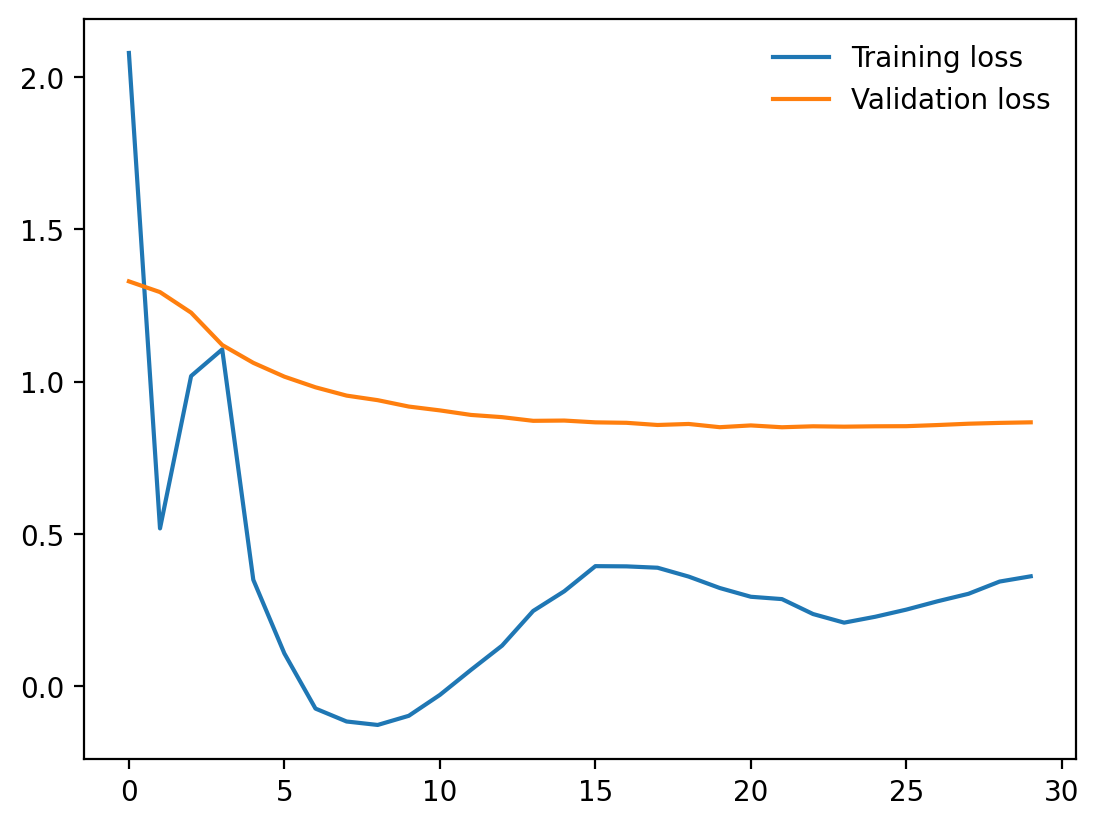

In [ ]:
# trial: 12
model = FactorizationModel(embedding_dim=16,
                                   n_iter=30,
                                   learning_rate=0.03,
                                   l2=2e-11,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 8.00679758022581, loss_val 3.7974413521020263
Validation loss decreased (inf --> 3.797441).  Saving model ...
Epoch 1: loss_train 1.6760579796388564, loss_val 3.6482765257543
Validation loss decreased (3.797441 --> 3.648277).  Saving model ...
Epoch 2: loss_train 2.78350632184366, loss_val 3.434134632202458
Validation loss decreased (3.648277 --> 3.434135).  Saving model ...
Epoch 3: loss_train 3.034019442674333, loss_val 3.0752791353559132
Validation loss decreased (3.434135 --> 3.075279).  Saving model ...
Epoch 4: loss_train 1.3973728284597415, loss_val 2.903270870388341
Validation loss decreased (3.075279 --> 2.903271).  Saving model ...
Epoch 5: loss_train 1.1046223332321945, loss_val 2.7588949265514975
Validation loss decreased (2.903271 --> 2.758895).  Saving model ...
Epoch 6: loss_train 0.9323183863939423, loss_val 2.671756403333601
Validation loss decreased (2.758895 --> 2.671756).  Saving model ...
Epoch 7: loss_train 0.897645696831005, loss_val 2.6022194

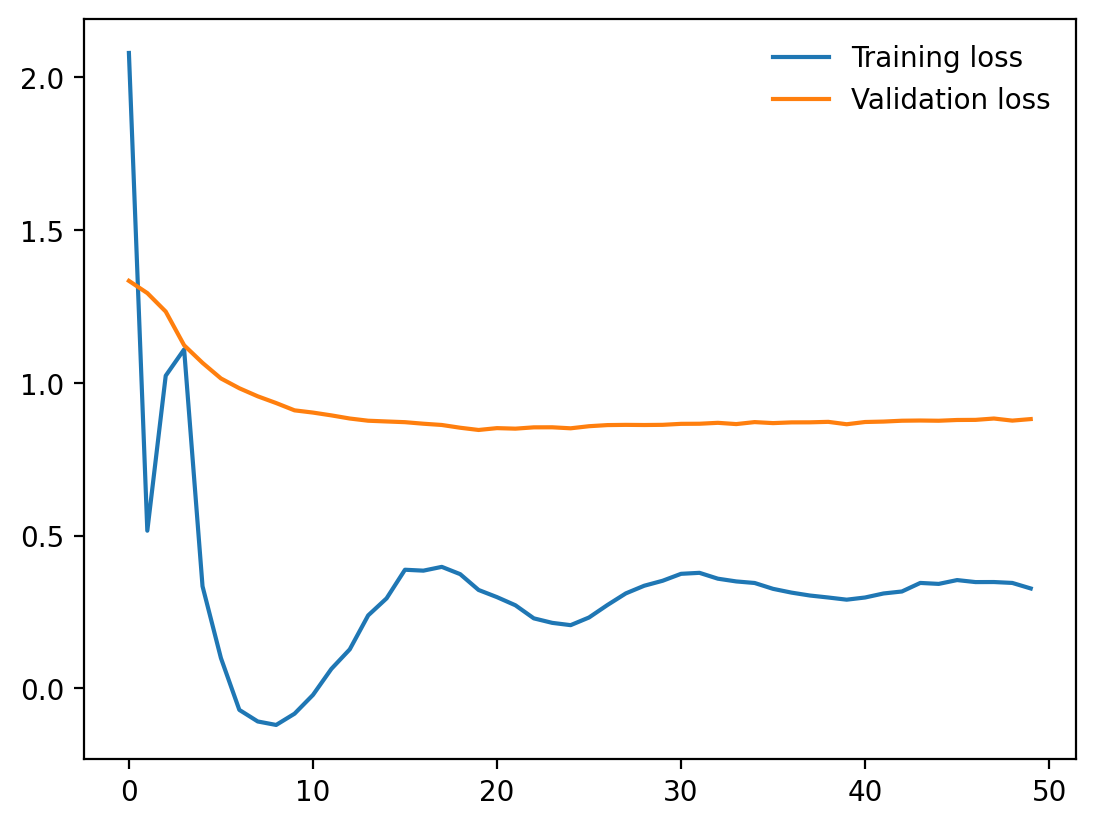

In [ ]:
# trial: 13
model = FactorizationModel(embedding_dim=16,
                                   n_iter=50,
                                   learning_rate=0.03,
                                   l2=2e-13,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 10.162500672006864, loss_val 5.214872500941449
Validation loss decreased (inf --> 5.214873).  Saving model ...
Epoch 1: loss_train 1.797756914643748, loss_val 4.619234613385176
Validation loss decreased (5.214873 --> 4.619235).  Saving model ...
Epoch 2: loss_train 0.7967393886603512, loss_val 4.337351355442271
Validation loss decreased (4.619235 --> 4.337351).  Saving model ...
Epoch 3: loss_train 0.8503904109845197, loss_val 4.0998740049243985
Validation loss decreased (4.337351 --> 4.099874).  Saving model ...
Epoch 4: loss_train 0.6707860270987027, loss_val 3.8799687836725045
Validation loss decreased (4.099874 --> 3.879969).  Saving model ...
Epoch 5: loss_train 0.6039622464080447, loss_val 3.670463164097872
Validation loss decreased (3.879969 --> 3.670463).  Saving model ...
Epoch 6: loss_train 0.5247668285293424, loss_val 3.4767322298182823
Validation loss decreased (3.670463 --> 3.476732).  Saving model ...
Epoch 7: loss_train 0.5105061150157509, loss_val 3.

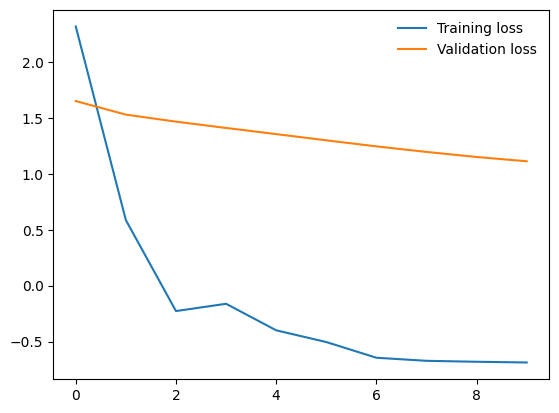

In [69]:
# trial: 14
model = FactorizationModel(embedding_dim=16,
                                   n_iter=10,
                                   learning_rate=0.02,
                                   l2=2e-11,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

TESTING THE MODEL ON RATINGS

In [ ]:
numitem_2_name = {i:name for name,i in np.asarray(cdata[['title', 'asin_id']])}
name_2_numitem = {name:i for name,i in np.asarray(cdata[['title', 'asin_id']])}

In [ ]:
my_rating = {}

for x, y, z in test_dataset:  # reviewerID, asin, rating
    x = int(x)
    z = int(z)
    if x not in my_rating:
        my_rating[x] = []
    my_rating[x].append(z)

print(my_rating)

{362019: [4], 243032: [5], 291762: [5, 1], 49199: [1], 196356: [1], 37302: [1], 13569: [5], 404: [5], 107376: [2, 2], 125185: [5], 390560: [5], 156532: [5], 281243: [5], 208137: [5], 23102: [5], 272993: [5], 69788: [5], 374673: [5], 306355: [4], 266749: [5], 253723: [4], 36107: [5], 365940: [1], 342739: [4], 276925: [1], 303575: [3], 354746: [3], 346590: [3], 327581: [5], 16384: [4], 477037: [5], 176177: [5], 476022: [5], 142760: [5], 195650: [5], 326138: [5], 512718: [2], 125394: [5, 5], 160433: [5], 445991: [5], 262498: [5], 270691: [5], 441550: [5], 67079: [5], 264146: [5], 403449: [5], 419809: [5], 222603: [5], 88987: [5], 112685: [1], 278477: [5], 182907: [1], 39119: [5], 325115: [5], 384611: [5], 290367: [4], 432079: [5], 169659: [2], 34510: [3], 170921: [2], 480319: [5], 291778: [2], 55332: [5], 441269: [1], 493447: [5], 315194: [2], 76649: [4], 192704: [5], 275087: [4], 157723: [5], 353454: [4], 334879: [5], 473141: [5], 357650: [5], 447016: [5], 154291: [1], 138829: [5], 28968

In [ ]:
modified_ratings = {}
for reviewer_id, ratings_list in my_rating.items():
    if len(ratings_list) > 0:
        modified_ratings[reviewer_id] = ratings_list[0]

print(modified_ratings)
my_ratings = modified_ratings
print(len(my_rating))

{362019: 4, 243032: 5, 291762: 5, 49199: 1, 196356: 1, 37302: 1, 13569: 5, 404: 5, 107376: 2, 125185: 5, 390560: 5, 156532: 5, 281243: 5, 208137: 5, 23102: 5, 272993: 5, 69788: 5, 374673: 5, 306355: 4, 266749: 5, 253723: 4, 36107: 5, 365940: 1, 342739: 4, 276925: 1, 303575: 3, 354746: 3, 346590: 3, 327581: 5, 16384: 4, 477037: 5, 176177: 5, 476022: 5, 142760: 5, 195650: 5, 326138: 5, 512718: 2, 125394: 5, 160433: 5, 445991: 5, 262498: 5, 270691: 5, 441550: 5, 67079: 5, 264146: 5, 403449: 5, 419809: 5, 222603: 5, 88987: 5, 112685: 1, 278477: 5, 182907: 1, 39119: 5, 325115: 5, 384611: 5, 290367: 4, 432079: 5, 169659: 2, 34510: 3, 170921: 2, 480319: 5, 291778: 2, 55332: 5, 441269: 1, 493447: 5, 315194: 2, 76649: 4, 192704: 5, 275087: 4, 157723: 5, 353454: 4, 334879: 5, 473141: 5, 357650: 5, 447016: 5, 154291: 1, 138829: 5, 28968: 5, 340739: 5, 175915: 5, 451000: 5, 255661: 4, 367251: 5, 331439: 2, 397031: 5, 93975: 5, 504121: 1, 200313: 5, 248169: 5, 166123: 4, 335754: 5, 310761: 1, 40978

In [ ]:
my_ratings = {int(y): int(z) for x, y, z in test_dataset[2:53]}
print(my_ratings)

{7009: 5, 7836: 1, 28664: 1, 11902: 1, 16237: 5, 264: 5, 22154: 2, 61: 5, 7347: 5, 4724: 5, 10545: 5, 5739: 5, 6840: 5, 26245: 5, 28187: 5, 12782: 5, 11800: 4, 6791: 5, 5364: 4, 5571: 3, 11405: 1, 553: 4, 28787: 5, 3088: 3, 379: 3, 12780: 5, 1927: 4, 12692: 5, 12226: 5, 2052: 5, 12398: 5, 18393: 5, 12786: 5, 25939: 2, 12607: 5, 980: 5, 28634: 5, 19519: 5, 6844: 5, 22489: 5, 176: 5, 21121: 5, 18664: 5, 21801: 5, 29617: 5, 4064: 1, 3929: 5, 23918: 1, 2076: 5}


In [ ]:
my_rated_items = [name for name in list(my_ratings.keys())]

In [ ]:
item_emb_np = model._net.item_embeddings.weight.data.cpu().numpy()

In [ ]:
len(my_rated_items)

49

In [ ]:
item_emb_np.shape

(30238, 16)

In [ ]:
# item_emb_np[my_rated_items, :]

In [ ]:
my_rated_items = [x for x in list(my_ratings.keys())]
len(my_rated_items)

49

In [ ]:
len(my_ratings)

49

In [ ]:
item_emb_np.shape

(30238, 16)

In [ ]:
my_rated_items = [name for name in list(my_ratings.keys())]

In [ ]:
# item_emb_np.shape

In [ ]:
cdata.sort_values(['asin_id']).head(5)

,reviewerID,asin,overall,unixReviewTime,title,brand,asin_id
553851,152716,7301113188,5.0,1236902400,Tupperware Freezer Square Round Container Set ...,Tupperware,0
551259,313589,7861850250,3.0,1484352000,2 X Tupperware Pure &amp; Fresh Unique Covered...,Tupperware,1
551260,390275,8792559360,5.0,1483056000,The Cigar - Moments of Pleasure,The Cigar Book,2
551261,414178,8792559360,5.0,1481673600,The Cigar - Moments of Pleasure,The Cigar Book,2
551262,462539,8792559360,5.0,1481673600,The Cigar - Moments of Pleasure,The Cigar Book,2


In [ ]:
# item_emb_np[my_rated_items, :]

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, fit_intercept=True)
clf.fit(item_emb_np[my_rated_items, :], list(my_ratings.values()))
my_emb_np = clf.coef_
my_emb_bias = clf.intercept_

In [ ]:
item_bias_np = model._net.item_biases.weight.data.cpu().numpy()
item_bias_np = item_bias_np.squeeze()

In [ ]:
item_bias_np.shape

(30238,)

In [ ]:
my_rating_results = (my_emb_np * item_emb_np).sum(1) + item_bias_np + my_emb_bias
my_results = [(numitem_2_name[item], ratings) for item, ratings in enumerate(my_rating_results)]
my_results_df = pd.DataFrame(my_results, columns = ["title", "pred_ratings"])

In [ ]:
my_results_df

,title,pred_ratings
0,Tupperware Freezer Square Round Container Set ...,6.453519
1,2 X Tupperware Pure &amp; Fresh Unique Covered...,4.322010
2,The Cigar - Moments of Pleasure,7.971640
3,Caraselle 2X 50G Appliance Descalene,8.362270
4,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,4.585704
...,...,...
30233,Bosch 00494772 Sealing,6.739182
30234,Bosch 00642855 Sensor,7.600310
30235,Bosch 00175338 Switch,4.361956
30236,Frigidaire 316543810 Knob,6.477921


In [ ]:
my_results_df.describe()

,pred_ratings
count,30238.000000
mean,6.621285
std,1.635540
min,-0.999672
25%,5.472700
50%,6.815225
75%,7.834872
max,13.284141


TESTING MODEL - GETTING PREDICTION VALUES FOR TEST SET
- Setting up Guardrails [1,5]

In [ ]:
# Set the model in evaluation mode
model._net.eval()
all_predictions = []
with torch.no_grad():
    # Iterate through the test dataloader
    for batch_user, batch_item, batch_rating in test_dataloader:
        batch_user = batch_user.to(device)
        batch_item = batch_item.to(device)

        # Get predictions from the model
        predictions = model._net(batch_user, batch_item)

        # Apply guardrails to ensure predictions are within 1 to 5 range
        predictions = torch.clamp(predictions, 1, 5)
        all_predictions.append(predictions.cpu().numpy())
all_predictions = np.concatenate(all_predictions, axis=0)


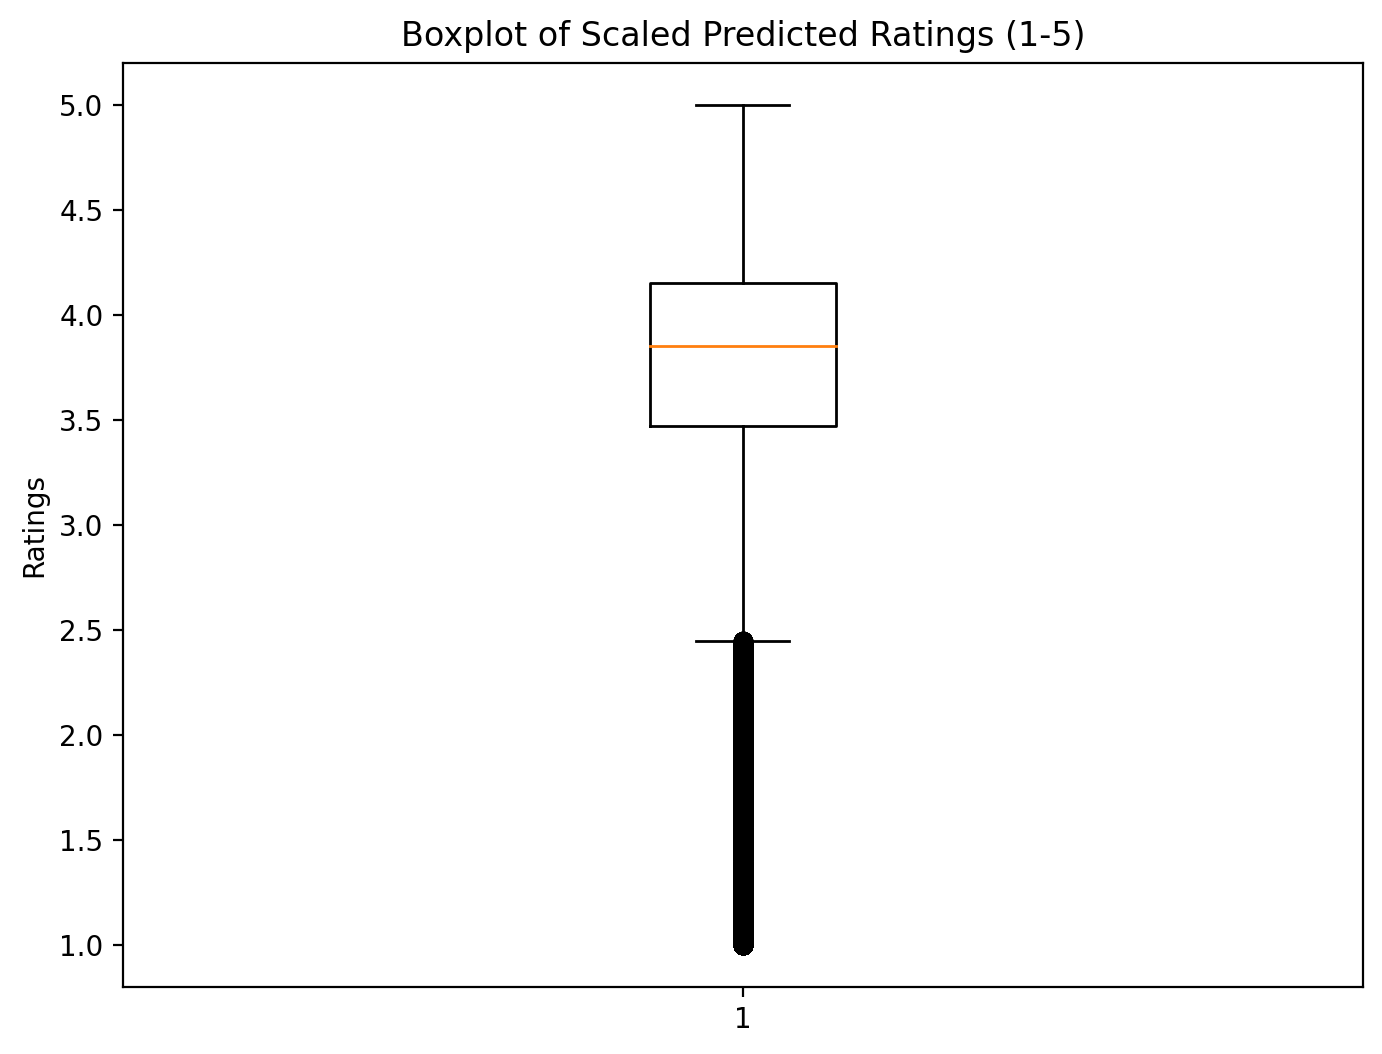

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(all_predictions)
plt.title('Boxplot of Scaled Predicted Ratings (1-5)')
plt.ylabel('Ratings')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(all_predictions, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Scaled Predicted Ratings (1-5)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
df11 = pd.DataFrame(all_predictions)

In [ ]:
df11.describe()

,0
count,61575.000000
mean,3.726435
std,0.890348
min,1.000000
25%,3.468022
50%,3.848682
75%,4.149935
max,5.000000
